In [115]:
import GameManager_3
import PlayerAI_3
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
import tensorflow as tf

In [228]:
res=GameManager_3.main(v=1,n=250)

t:  0 1 4.5299530029296875e-06
[0, 1.2, 1, 0, 0.0012, 0.0003]
[256, 128, 256, 128, 128, 256, 256, 256, 128, 128, 256, 512, 128, 128, 128, 128, 128, 256, 128, 512, 256, 256, 512, 128, 128, 256, 128, 256, 256, 256, 256, 128, 128, 512, 128, 256, 256, 256, 128, 256, 128, 128, 256, 256, 256, 64, 64, 512, 128, 128, 256, 256, 512, 128, 512, 128, 128, 128, 256, 512, 256, 512, 256, 256, 256, 512, 512, 256, 128, 128, 256, 256, 256, 128, 512, 64, 256, 256, 256, 256, 256, 256, 128, 512, 64, 256, 512, 256, 256, 256, 512, 256, 512, 128, 128, 128, 128, 256, 256, 128, 512, 512, 128, 256, 512, 256, 256, 128, 128, 256, 256, 128, 64, 128, 256, 128, 128, 256, 512, 128, 256, 512, 64, 128, 256, 512, 256, 128, 512, 256, 256, 256, 256, 256, 256, 512, 128, 128, 256, 512, 256, 256, 512, 128, 256, 256, 256, 128, 256, 128, 256, 128, 256, 256, 256, 128, 256, 256, 512, 512, 512, 128, 256, 256, 256, 256, 128, 128, 128, 256, 128, 512, 128, 128, 256, 256, 256, 256, 64, 256, 128, 256, 512, 256, 64, 256, 256, 128, 64, 2

In [229]:
p=PlayerAI_3.PlayerAI([0,0.5,10,10,0,-3e-2])

<IPython.core.display.Javascript object>


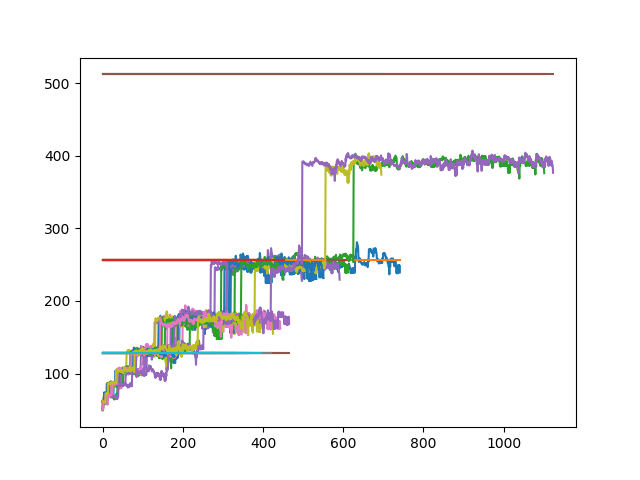

In [230]:
%matplotlib notebook
for n in range(25):
    h=[p.getHeuristic(x) for x in res[0][2][n][1].chain]
    plt.plot(h)
    plt.plot([0,len(h)],[res[0][2][n][0],res[0][2][n][0]])

In [5]:
res[0][2][1][0]

256

In [231]:
s=np.array([np.hstack((np.array(x.map).flatten(),[res[0][2][0][0]])) for x in res[0][2][0][1].chain])
for n in range(1,25):
    s=np.vstack((s,np.array([np.hstack((np.array(x.map).flatten(),[res[0][2][n][0]])) for x in res[0][2][n][1].chain])))
l=s[:,-1:]
f=s[:,:-1]
f[f==0]=1
w=1/(np.sum(s[:,:-1]==0,1)+1)
ll=np.log2(l)
fl=np.log2(f)


<IPython.core.display.Javascript object>


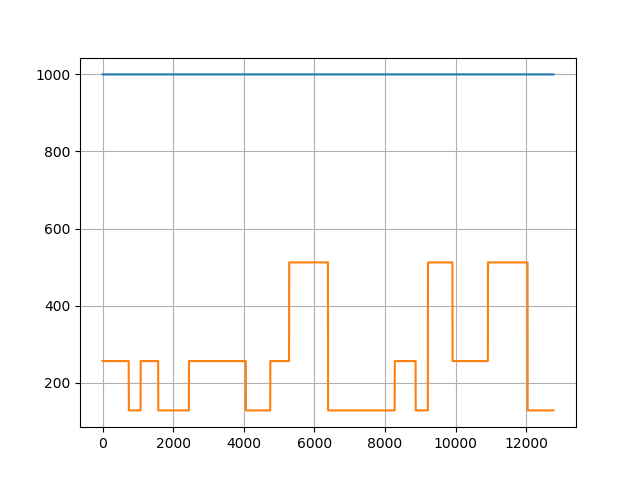

In [232]:
%matplotlib notebook
plt.plot(1000*w)
plt.plot(l)
plt.grid()

In [72]:
sess = tf.InteractiveSession()


In [233]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
fl, ll, test_size=0.2, random_state=42)

In [234]:
feature_columns = [
tf.feature_column.numeric_column('x', shape=np.array(x_train).shape[1:])]

In [254]:
regressor = tf.estimator.DNNRegressor(
      feature_columns=feature_columns, hidden_units=[500, 10,10],
        optimizer=tf.train.ProximalAdagradOptimizer(
          learning_rate=0.0001,
          l1_regularization_strength=0.001
    ))


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpqv3alyjf', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7efdb05443c8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [255]:
train_input_fn = tf.estimator.inputs.numpy_input_fn(
x={'x': x_train}, y=y_train, batch_size=1000, num_epochs=None, shuffle=True)

In [281]:
regressor.train(input_fn=train_input_fn, steps=5000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpqv3alyjf/model.ckpt-55000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 55000 into /tmp/tmpqv3alyjf/model.ckpt.
INFO:tensorflow:loss = 1880.1343, step = 55001
INFO:tensorflow:global_step/sec: 55.8801
INFO:tensorflow:loss = 2017.8014, step = 55101 (1.791 sec)
INFO:tensorflow:global_step/sec: 57.858
INFO:tensorflow:loss = 2017.2229, step = 55201 (1.729 sec)
INFO:tensorflow:global_step/sec: 57.4138
INFO:tensorflow:loss = 2243.773, step = 55301 (1.742 sec)
INFO:tensorflow:global_step/sec: 57.4087
INFO:tensorflow:loss = 1965.6697, step = 55401 (1.742 sec)
INFO:tensorflow:global_step/sec: 57.2031
INFO:tensorflow:loss = 1900.9177, step = 55501 (1.749 sec)
INFO:tensorflow:global_step/sec: 58.4289
INFO:tensorflow:loss =

In [282]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'x': x_test}, y=y_test, num_epochs=1, shuffle=False)

In [283]:
predictions = regressor.predict(input_fn=test_input_fn)

In [284]:
y_predicted = np.array(list(p['predictions'] for p in predictions))
y_predicted = y_predicted.reshape(np.array(y_test).shape)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpqv3alyjf/model.ckpt-60000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


<IPython.core.display.Javascript object>


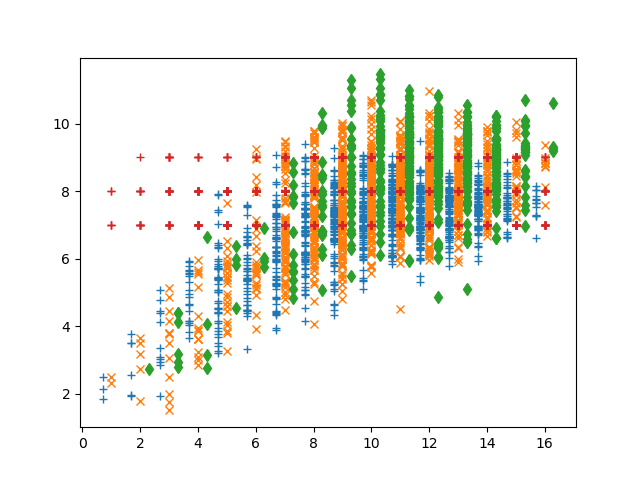

In [285]:
%matplotlib notebook
plt.plot((16-np.sum(x_test==0,1))[y_test.reshape(-1,)==7]-.3,y_predicted[y_test==7],'+')
plt.plot((16-np.sum(x_test==0,1))[y_test.reshape(-1,)==8],y_predicted[y_test==8],'x')
plt.plot((16-np.sum(x_test==0,1))[y_test.reshape(-1,)==9]+.3,y_predicted[y_test==9],'d')
plt.plot(16-np.sum(x_test==0,1),y_test,'+')

#plt.plot(np.max(x_test,1),'+')
#plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()])

<IPython.core.display.Javascript object>


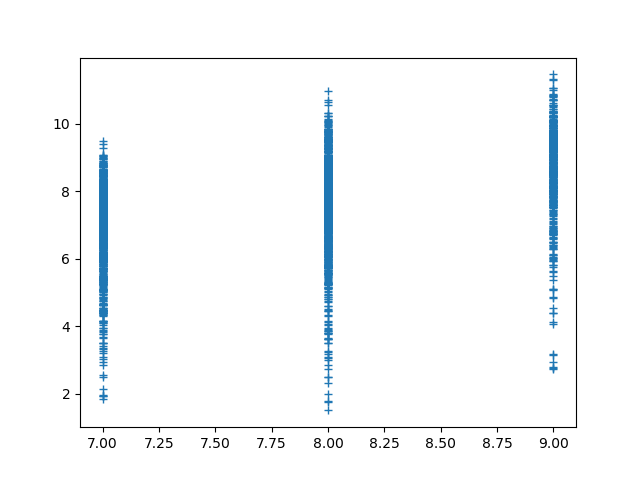

In [286]:
%matplotlib notebook
plt.plot(y_test,y_predicted,'+')


In [10]:
x = tf.placeholder(tf.float32, shape=[None, 16])
y_ = tf.placeholder(tf.float32, shape=[None, 1])


In [11]:
W = tf.Variable(tf.zeros([16,1]),dtype=tf.float32)
b = tf.Variable(tf.zeros([1]),dtype=tf.float32)


In [12]:
y = tf.matmul(x,W) + b

In [13]:
cross_entropy = tf.losses.mean_squared_error(y_,y)

In [56]:
train_step = tf.train.GradientDescentOptimizer(0.0015).minimize(cross_entropy)


In [104]:
data=tf.data.Dataset.from_tensors(s)

In [15]:
input_grids=tf.constant(s[:,:-1],dtype=tf.float32)
input_labels=tf.constant(s[:,-1],dtype=tf.float32)
grid,label = tf.train.slice_input_producer(
[input_grids,input_labels])
label = tf.cast(label, tf.float32)
grid = tf.cast(grid, tf.float32)
grids,labels=tf.train.batch([grid,label],3)

In [105]:
def input_train():
    return (
        # Shuffling with a buffer larger than the data set ensures
        # that the examples are well mixed.
        data.shuffle(1000).batch(128)
        # Repeat forever
        .repeat().make_one_shot_iterator().get_next())

  # Build the validation input_fn.
def input_test():
    return (data.shuffle(1000).batch(128)
            .make_one_shot_iterator().get_next())

In [110]:
model = tf.estimator.DNNRegressor(hidden_units=[20, 20], feature_columns=[-1])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpkgkwsqda', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7efe216fc3c8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [111]:
model.train(input_fn=input_train, steps=10)

INFO:tensorflow:Calling model_fn.


ValueError: features should be a dictionary of `Tensor`s. Given type: <class 'tensorflow.python.framework.ops.Tensor'>

In [74]:
tf.global_variables_initializer().run()

In [89]:
#with tf.Session() as sess:



#    coord = tf.train.Coordinator()
#    threads = tf.train.start_queue_runners(coord=coord)
    
for i in range(1000):
    y_proccessed = sess.run(train_step, feed_dict={x: fl, y_: ll})
print(sess.run(W))


#    coord.request_stop()
#    coord.join(threads)

#sess.close()

[[ 0.37138212]
 [ 0.16473764]
 [ 0.1577094 ]
 [ 0.1758948 ]
 [ 0.12225819]
 [-0.11674463]
 [-0.06136946]
 [ 0.16942732]
 [ 0.2488013 ]
 [-0.15495218]
 [-0.06324906]
 [ 0.23083125]
 [ 0.22068778]
 [ 0.11449914]
 [ 0.15771502]
 [ 0.24988931]]


In [90]:
Wf=sess.run(W)
bf=sess.run(b)

<IPython.core.display.Javascript object>


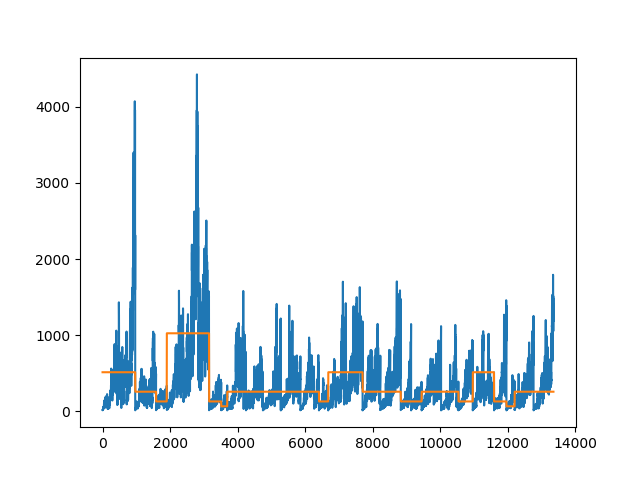

In [91]:
%matplotlib notebook
plt.plot(2**(np.matmul(fl,Wf)+bf))
plt.plot(l)

In [112]:
from sklearn import datasets

In [113]:
boston = datasets.load_boston()
x, y = boston.data, boston.target

In [119]:
np.array(x_train).shape[1:]

(16,)

In [107]:
input_train()

<tf.Tensor 'IteratorGetNext_2:0' shape=(?, 13360, 17) dtype=int64>

In [24]:
grids

<tf.Tensor 'batch:0' shape=(3, 16) dtype=float32>

In [103]:
data=tf.data.Dataset.from_tensors(s)
tlabels=tf.data.Dataset.from_tensors(labels)

In [98]:
tt=tgrids.shuffle(1000).batch(10)

In [100]:
kk=tt.repeat().make_initializable_iterator().get_next()

In [102]:
kk.eval()

FailedPreconditionError: GetNext() failed because the iterator has not been initialized. Ensure that you have run the initializer operation for this iterator before getting the next element.
	 [[Node: IteratorGetNext_1 = IteratorGetNext[output_shapes=[[?,3,16]], output_types=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](Iterator_1)]]

Caused by op 'IteratorGetNext_1', defined at:
  File "/usr/lib64/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib64/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/usr/lib64/python3.6/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/usr/lib64/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/lib64/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/usr/lib64/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/lib64/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/usr/lib64/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-100-0afe0d1cc9b2>", line 1, in <module>
    kk=tt.repeat().make_initializable_iterator().get_next()
  File "/home/tmh/tensorflow/venv/lib/python3.6/site-packages/tensorflow/python/data/ops/iterator_ops.py", line 373, in get_next
    name=name)), self._output_types,
  File "/home/tmh/tensorflow/venv/lib/python3.6/site-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1745, in iterator_get_next
    output_shapes=output_shapes, name=name)
  File "/home/tmh/tensorflow/venv/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/tmh/tensorflow/venv/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3414, in create_op
    op_def=op_def)
  File "/home/tmh/tensorflow/venv/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1740, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

FailedPreconditionError (see above for traceback): GetNext() failed because the iterator has not been initialized. Ensure that you have run the initializer operation for this iterator before getting the next element.
	 [[Node: IteratorGetNext_1 = IteratorGetNext[output_shapes=[[?,3,16]], output_types=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](Iterator_1)]]


In [166]:
tf.VERSION

'1.9.0'

In [215]:
np.max(x_test,1).shape

(2672,)

In [216]:
x_test.shape

(2672, 16)

In [273]:
np.sum(x_test==0,1)[y_test.reshape(-1,)==9]

array([ 8,  6,  5,  4,  4,  4,  0,  7,  5, 11,  4,  4,  3,  6,  2,  1,  6,
        2,  3,  1,  5,  9,  4,  5,  2,  6,  2,  4,  2,  6,  3,  5,  3,  5,
        5,  5,  4,  4,  1,  6,  3,  1,  8,  6,  4,  6,  6,  7,  7,  2,  6,
        5,  4,  5,  6,  3,  3,  2,  2,  1,  2,  3,  3,  5,  3,  4,  4,  4,
        7,  2,  7,  5,  5, 10,  8,  7,  2,  5,  5,  5,  5,  5,  5,  4,  1,
        4,  4,  5,  4,  6,  7,  5,  2,  8,  3,  5,  5,  6,  6,  8,  5,  8,
        4,  6,  8,  2,  2,  1,  3,  4,  2,  5,  4,  4,  0,  3,  4,  3, 13,
        6,  5,  6,  1,  5,  7,  5,  9,  2,  6,  5,  5,  4,  5,  3,  4,  3,
        3,  5,  2,  2,  5,  2,  5,  2, 13,  4,  4,  6,  2,  6,  3,  6,  1,
        6,  3, 11,  5,  6,  5,  7,  9,  4,  3,  3,  1, 13,  2,  2,  4,  7,
        7,  2,  7,  3,  4, 10,  4,  3,  2,  6,  7,  3,  5,  4,  7, 12,  2,
        8,  5,  2,  5,  3,  3,  4,  6,  6,  5,  5,  2,  4,  4,  6,  3,  5,
        8,  4,  3,  1,  4,  2,  2,  2,  6,  4,  5,  1,  2,  4,  7,  5,  2,
        9,  8,  5,  5,  2

In [268]:
y_predicted[y_test==9]

array([ 8.117444 ,  7.256322 ,  8.873088 ,  8.096324 ,  9.603598 ,
        8.801854 ,  9.466064 ,  8.949904 , 10.525792 ,  5.5264473,
        9.426983 ,  9.372246 ,  5.0776787, 10.197594 ,  8.943835 ,
        9.432932 ,  7.7057366,  9.252755 ,  8.4170685,  9.568334 ,
        6.7336006,  8.631159 ,  7.8114767,  9.372299 ,  9.1163025,
       10.297274 ,  8.172977 ,  7.889182 ,  9.248088 ,  9.031189 ,
        7.599318 ,  7.974729 ,  8.274666 ,  7.8541965,  9.1396475,
        8.664011 ,  8.8610115,  8.55821  ,  9.548907 ,  7.22535  ,
        8.9724655,  9.417248 ,  9.898318 ,  6.5682554,  8.538613 ,
        8.041582 ,  8.0290165,  7.708994 ,  8.65815  ,  9.171463 ,
        8.609837 ,  9.290713 ,  9.464854 ,  7.7134147,  9.279363 ,
        9.745481 ,  8.774666 ,  9.293522 ,  7.6090617,  9.597411 ,
        9.431245 ,  9.910496 ,  9.409648 ,  8.92614  ,  7.9986014,
        9.792487 ,  8.044608 ,  6.229341 ,  7.443137 ,  9.983121 ,
        5.4363484, 10.06102  , 10.620162 ,  6.677329 ,  6.5450

In [272]:
y_test.reshape(-1,)==9

array([8., 9., 7., ..., 9., 7., 7.])